In [1]:
#importamos librerias
import pandas as pd                                # Se trabaja todo lo que es la estructura de los datos
import statsmodels.formula.api as smf              # Permite ajustar modelos estadísticos utilizando fórmulas de estilo R
import numpy as np                                 # Representa matrices multidimensionales, equivalentes a las matrices del R
from mpl_toolkits.mplot3d import Axes3D            # Permite agregar eje tridimensionales
from sklearn.linear_model import LinearRegression  # Permite crear y ajustar modelos de regresión lineal
from sklearn import metrics                        # Proporciona herramientas para evaluar la precisión de los modelos
import matplotlib.pyplot as plt                    # Otra forma de generar gráficos con matplotlib
import seaborn as sns                              # Facilita la creación de gráficos estadísticos atractivos
import statsmodels.api as sm                       # Proporciona herramientas adicionales para estimación y pruebas estadísticas
from sklearn.model_selection import train_test_split # Permite dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.metrics import mean_squared_error  # Para calcular el error cuadrático medio
import math                                     # Para operaciones matemáticas
# import the visualization package: seaborn
%matplotlib inline 

In [2]:
#importar archivo csv
df = pd.read_csv(r'vgsales.csv')
# Información general sobre el DataFrame
df.info()
# Estadísticas descriptivas del DataFrame
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


In [3]:
#vista más clara de la dataframe
df.columns
df.head(5)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# Contamos los valores faltantes por columna
missing_data = df.isnull().sum()
print(missing_data)


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [5]:

#eliminamos las filas con los valores N/A 
df = df.dropna()

In [6]:
 # Convertir columnas a tipos adecuados para la regresion 
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Global_Sales'] = pd.to_numeric(df['Global_Sales'], errors='coerce')


In [7]:
# Asegurarse de que no haya valores faltantes
df = df.dropna(subset=['Year', 'Global_Sales'])
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [10]:
#Calcula la frecuencia de cada categoría en la columna 'Genre' del df y almacena los resultados en la variable Genero.
Genero = df.value_counts ('Genre')

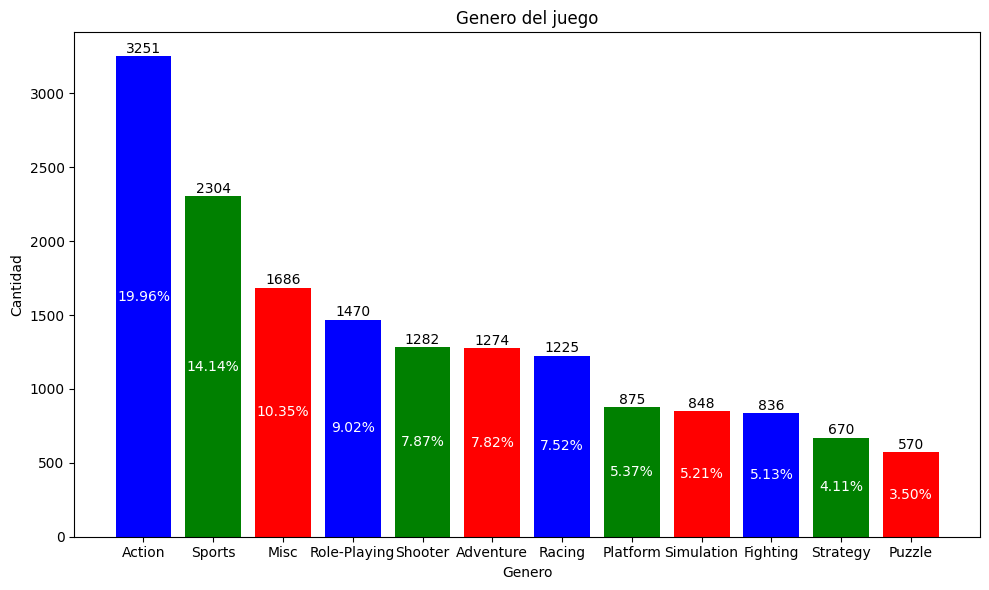

In [13]:
# Calculando el porcentaje para cada nivel de educación
education_percentage = (Genero / Genero.sum()) * 100

# Creando el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(Genero.index, Genero.values, color=['blue', 'green', 'red'])

# Añadiendo el número de datos y el porcentaje en las barras
for idx, bar in enumerate(bars):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 2, yval, ha='center', va='bottom', fontsize=10)
    ax.text(bar.get_x() + bar.get_width()/2, yval/2, f'{education_percentage.iloc[idx]:.2f}%', ha='center', va='center', fontsize=10, color='white')

ax.set_title('Genero del juego')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Genero')

plt.tight_layout()
plt.show()

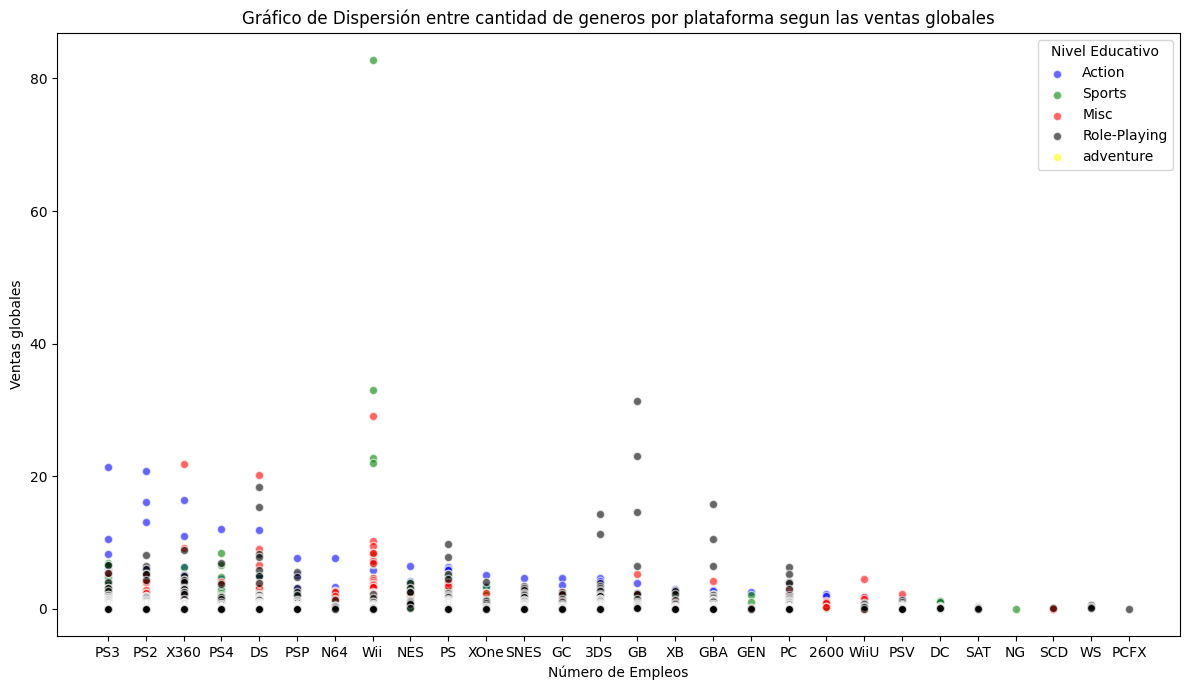

In [14]:
# Creando el gráfico de dispersión entre salario y el número de empleos, diferenciando por nivel educativo
fig, ax = plt.subplots(figsize=(12, 7))

# Colores para cada nivel educativo
colors = {'Action': 'blue', 'Sports': 'green', 'Misc': 'red', 'Role-Playing': 'black', 'adventure': 'yellow'}

# Creando el gráfico de dispersión diferenciado por nivel educativo
for education, color in colors.items():
    subset = df[df['Genre'] == education]
    ax.scatter(subset['Platform'], subset['Global_Sales'], c=color, label=education, alpha=0.6, edgecolors='white')

ax.set_title('Gráfico de Dispersión entre cantidad de generos por plataforma segun las ventas globales')
ax.set_ylabel('Ventas globales')
ax.set_xlabel('Número de Empleos')
ax.legend(title='Nivel Educativo')

plt.tight_layout()
plt.show()

In [15]:
#REGRESIÓN LINEAL SIMPLE 
# Separar variables independientes (X) y dependientes (y)
X = df[['Year']]
y = df['Global_Sales']


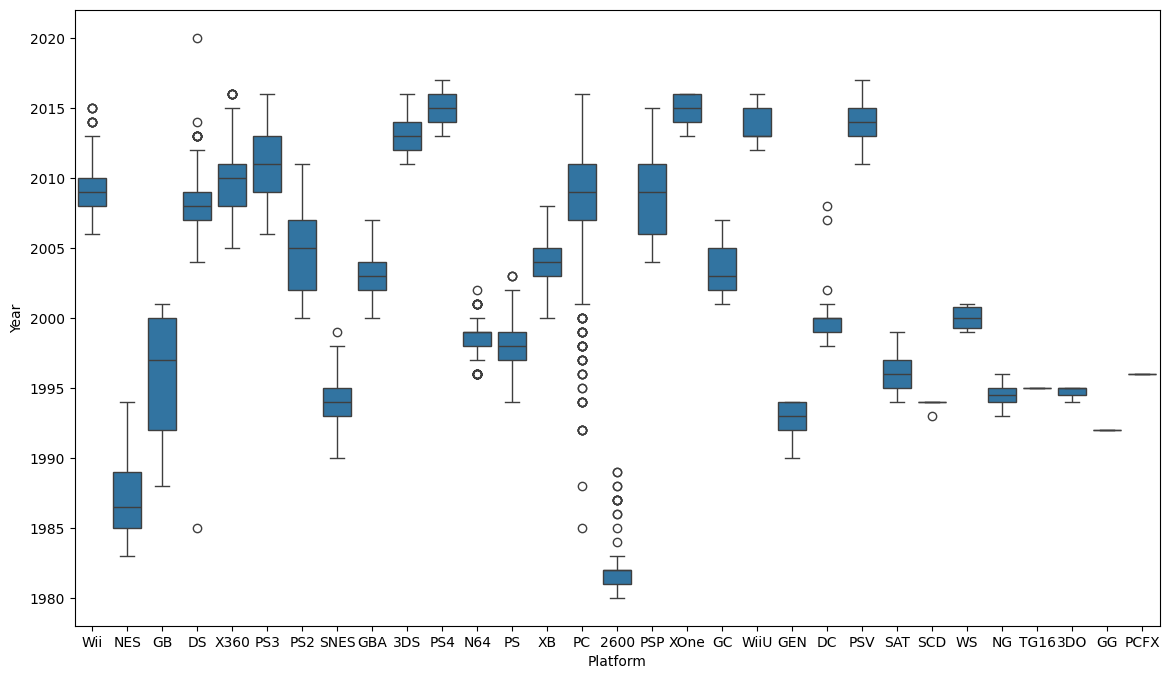

In [17]:
# Crea una figura más grande
plt.figure(figsize=(14, 8))  # Ajusta el tamaño según tus preferencias

# Crea el gráfico de caja
fig = sns.boxplot(x=df['Platform'], y=df['Year'])

# Muestra la gráfica
plt.show()

In [18]:
reg = smf.ols('Global_Sales ~ NA_Sales', data=df)  # Establece una regresión lineal utilizando el método de mínimos cuadrados ordinarios (OLS) donde 'Global_Sales' es la variable dependiente y 'NA_Sales' es la variable independiente. Se almacena el modelo de regresión en la variable reg.
res = reg.fit()  # Ajusta el modelo de regresión a los datos utilizando el método fit() y almacena los resultados en la variable res.


In [23]:
y = df['Global_Sales']  # Extrae la columna 'Global_Sales' del DataFrame df y la asigna a la variable y.


In [25]:

lm = LinearRegression()  # Crea un objeto de regresión lineal utilizando la clase LinearRegression de scikit-learn. Este objeto se utilizará para ajustar el modelo de regresión.
X = df[['NA_Sales']]  # Selecciona la columna 'NA_Sales' del DataFrame df y asigna los valores a la variable X. La doble corchete se usa para crear un DataFrame en lugar de una Serie.
lm


LinearRegression()

In [22]:
# Divide los datos en conjuntos de entrenamiento y prueba
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=0)
# Imprime el número de datos en el conjunto de prueba y entrenamiento
print("numero de datos de testeo :", x_test1.shape[0])
print("numero de datos de entrenamiento:",x_train1.shape[0])

numero de datos de testeo : 4888
numero de datos de entrenamiento: 11403


In [26]:
#información concisa sobre el propio objeto. Esta información incluye el tipo de datos, la cantidad de valores no nulos y el uso de memoria.
y_train1.info()

<class 'pandas.core.series.Series'>
Index: 11403 entries, 3459 to 2770
Series name: Global_Sales
Non-Null Count  Dtype  
--------------  -----  
11403 non-null  float64
dtypes: float64(1)
memory usage: 178.2 KB


In [27]:
#Ajusta el modelo de regresión lineal utilizando los datos de entrenamiento x_train1 y las etiquetas de entrenamiento y_train1.
lm.fit(x_train1,y_train1)
# Realiza prediccion utilizando el modelo de regresión lineal ajustado en todas las observaciones en el conjunto de datos X.
prediccion = lm.predict(X)
# Obtiene el término de intersección del modelo de regresión lineal.
a = lm.intercept_
# Obtiene los coeficientes de pendiente del modelo de regresión lineal.
b = lm.coef_

In [28]:
print('Prediccion')
print('*'*100)
# Imprime los valores predichos por el modelo de regresión lineal.
print(prediccion)     
print('*'*100)
 # Imprime los valores actuales de la variable dependiente (consumo)
print(y)             
 # Imprime el coeficiente de determinación (R^2) del modelo de regresión lineal.
print(lm.score(X,y))  

Prediccion
****************************************************************************************************
[7.61935679e+01 5.34201430e+01 2.91419470e+01 ... 5.58241704e-02
 5.58241704e-02 7.41750366e-02]
****************************************************************************************************
0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16593     0.01
16594     0.01
16595     0.01
16596     0.01
16597     0.01
Name: Global_Sales, Length: 16291, dtype: float64
0.8855164496038171


In [29]:
# Crea un diccionario con los valores reales y predichos.
resultados = {'Real': df['Global_Sales'], 'Predicción': prediccion}
# Crea un DataFrame a partir del diccionario de resultados.
result = pd.DataFrame(data=resultados)  
# Imprime el DataFrame que contiene los valores reales y predichos
print(result)  

        Real  Predicción
0      82.74   76.193568
1      40.24   53.420143
2      35.82   29.141947
3      33.00   28.958438
4      31.37   20.737250
...      ...         ...
16593   0.01    0.074175
16594   0.01    0.074175
16595   0.01    0.055824
16596   0.01    0.055824
16597   0.01    0.074175

[16291 rows x 2 columns]


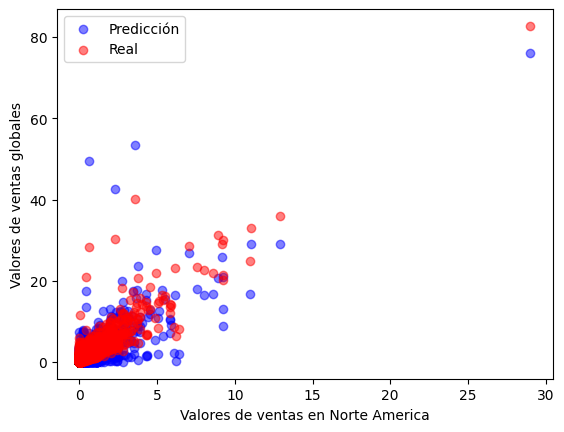

In [30]:
# Suponiendo que 'data' es tu DataFrame y 'prediccion' es la columna con las predicciones
resultados = {'Real': df['Global_Sales'], 'Prediccion': prediccion, 'Estatus': df['EU_Sales']}
result = pd.DataFrame(data=resultados)

# Crear la gráfica de puntos
plt.scatter(result['Estatus'], result['Prediccion'], c='blue', label='Predicción', alpha=0.5)
plt.scatter(result['Estatus'], result['Real'], c='red', label='Real', alpha=0.5)

# Etiquetas de ejes y leyenda
plt.xlabel('Valores de ventas en Norte America')
plt.ylabel('Valores de ventas globales')
plt.legend()

# Mostrar la gráfica
plt.show()

C:\Users\Mario\AppData\Local\Temp\ipykernel_17000\1951781277.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(result['Real'], color='red', label='Actual Value', shade=True)
C:\Users\Mario\AppData\Local\Temp\ipykernel_17000\1951781277.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(result['Prediccion'], color='blue', label='Fitted Values', shade=True, ax=ax)


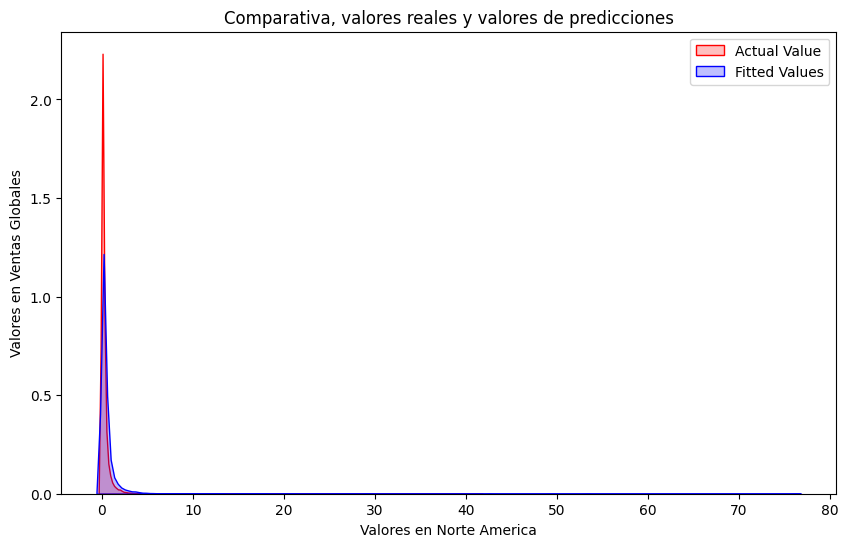

In [31]:
# Crear un DataFrame con los valores reales ('Real') y las predicciones ('Prediccion')
resultados = {'Real': df['NA_Sales'], 'Prediccion': prediccion}
result = pd.DataFrame(data=resultados)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Gráfico de distribución de los valores reales y predichos
ax = sns.kdeplot(result['Real'], color='red', label='Actual Value', shade=True)
sns.kdeplot(result['Prediccion'], color='blue', label='Fitted Values', shade=True, ax=ax)

# Configuración de etiquetas y título
plt.title('Comparativa, valores reales y valores de predicciones')
plt.xlabel('Valores en Norte America')
plt.ylabel('Valores en Ventas Globales')
plt.legend()

# Mostrar la gráfica
plt.show()
plt.close()

In [32]:
print(res.summary())    # Imprime un resumen detallado de los resultados del modelo de regresión.
print(res.rsquared)      # Imprime el coeficiente de determinación (R^2) del modelo.
print(res.params)        # Imprime los parámetros estimados del modelo, incluyendo la ordenada al origen y los coeficientes de pendiente.
mse = np.mean(res.resid**2)  # Calcula el error cuadrático medio (MSE) de las residuales del modelo.
print("Error cuadrático medio (MSE):", mse)  # Imprime el error cuadrático medio del modelo.
slope = res.params[1]    # Obtiene el coeficiente de la pendiente del modelo.
print("El coeficiente de la pendiente es:", slope)  # Imprime el coeficiente de la pendiente del modelo.


                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 1.266e+05
Date:                Wed, 15 May 2024   Prob (F-statistic):               0.00
Time:                        00:11:04   Log-Likelihood:                -12749.
No. Observations:               16291   AIC:                         2.550e+04
Df Residuals:                   16289   BIC:                         2.552e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0644      0.004     14.777      0.0

C:\Users\Mario\AppData\Local\Temp\ipykernel_17000\1179288325.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = res.params[1]    # Obtiene el coeficiente de la pendiente del modelo.


In [33]:
# Obtener los coeficientes del modelo
intercept = res.params[0]  # Coeficiente del intercepto (constante)
slope = res.params[1]      # Coeficiente de la pendiente (slope)

# Imprimir la ecuación de la línea de regresión predicha
print(f"Ecuación de la línea de regresión predicha: y = {intercept:.2f} + {slope:.2f} * Ventas en norte america")

Ecuación de la línea de regresión predicha: y = 0.06 + 1.79 * Ventas en norte america


C:\Users\Mario\AppData\Local\Temp\ipykernel_17000\1430362253.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = res.params[0]  # Coeficiente del intercepto (constante)
C:\Users\Mario\AppData\Local\Temp\ipykernel_17000\1430362253.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = res.params[1]      # Coeficiente de la pendiente (slope)


In [34]:
# Crea un nuevo DataFrame llamado df_2 que contiene solo las columnas 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales' y 'Global_Sales' del DataFrame original df.
df_2 = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']] 
# Muestra las primeras filas del nuevo DataFrame df_2.
df_2.head()



,Year,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,2006.0,41.49,29.02,3.77,82.74
1,1985.0,29.08,3.58,6.81,40.24
2,2008.0,15.85,12.88,3.79,35.82
3,2009.0,15.75,11.01,3.28,33.00
4,1996.0,11.27,8.89,10.22,31.37


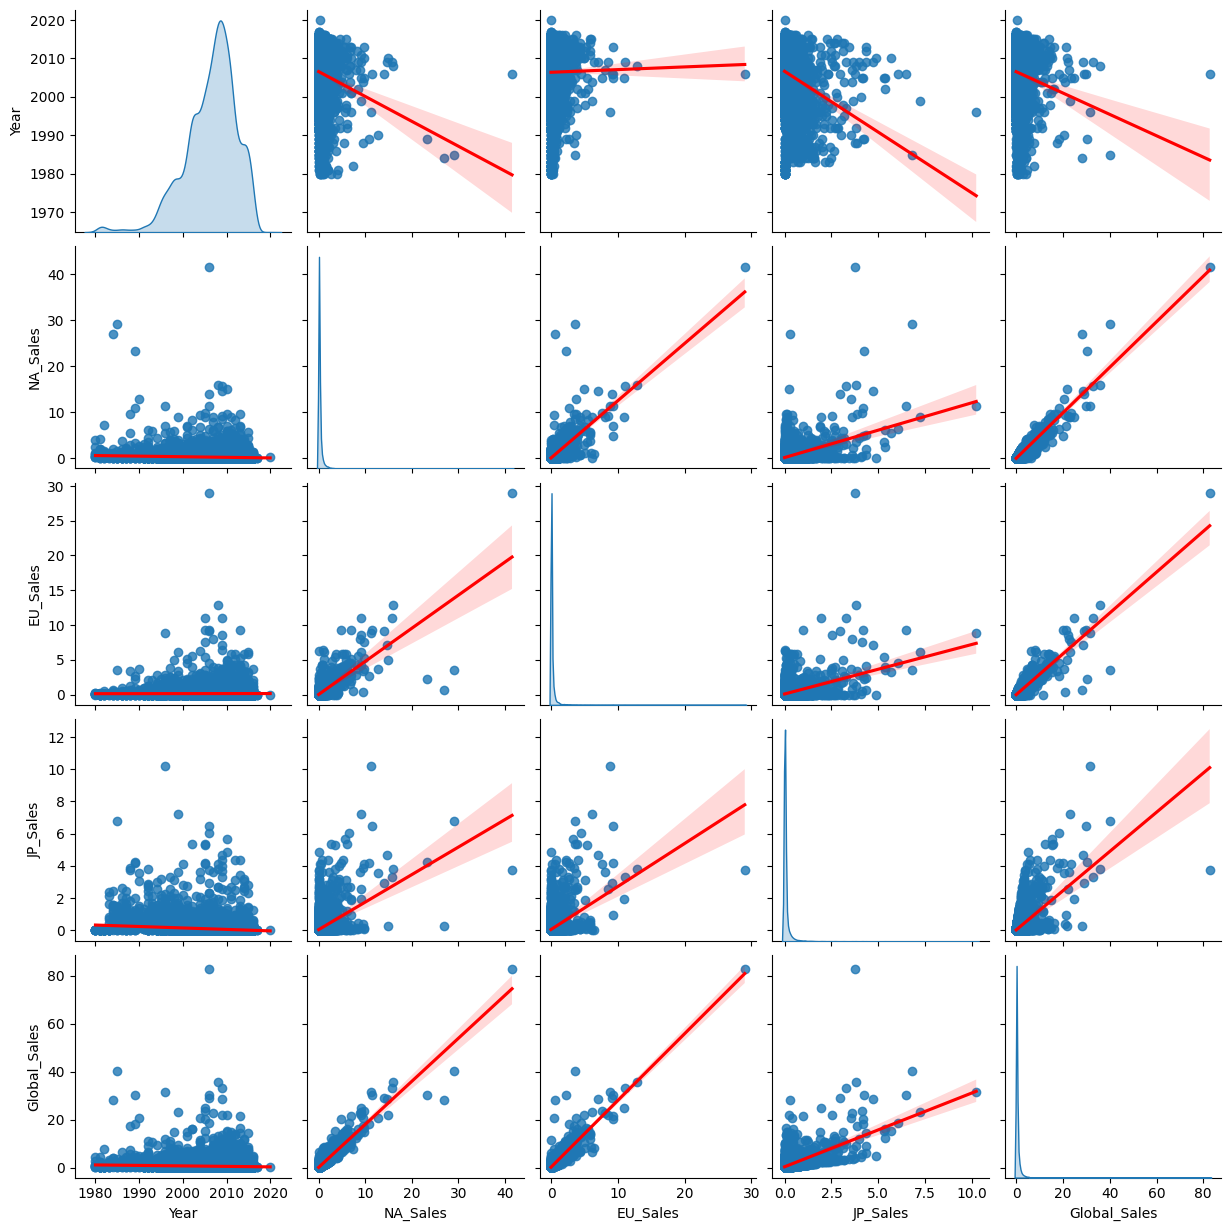

In [35]:
sns.pairplot(df_2,                       # DataFrame a utilizar
             kind='reg',                 # Tipo de gráfico en los diagramas de dispersión con regresión lineal
             diag_kind='kde',            # Tipo de gráfico en los diagramas diagonales 
             markers='o',                # Marcadores utilizados en los diagramas de dispersión
             plot_kws={'line_kws':{'color':'red'}})  # Argumentos adicionales de estilo para los gráficos (líneas de regresión en rojo)
